In [39]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("black_friday_sales.csv")

del df["Product_Category_2"]
del df["Product_Category_3"]

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
# How many unique customers are there
df["User_ID"].nunique()

5891

In [5]:
# User ID of the unique users
df["User_ID"].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      shape=(5891,))

In [6]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [7]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [8]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [10]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [11]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [12]:
df["Marital_Status"].unique()

array([0, 1])

In [13]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [14]:
df["Purchase"].sum()/len(df["Purchase"])

np.float64(9263.968712959126)

In [15]:
# Print all the columns
for column in df.columns:
    print(column, df[column].nunique())

User_ID 5891
Product_ID 3631
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 20
Purchase 18105


## Analyze Gender

In [16]:
df[df["Gender"]=="M"]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [17]:
# How many males have purchased, how many females have purchased?

In [18]:
data=pd.DataFrame({"Ratio":[len(df[df["Gender"]=="M"]), len(df[df["Gender"]=="F"])]}, index=["Male", "Female"])

In [19]:
data

,Ratio
Male,414259
Female,135809


## Pie Chart

<Axes: ylabel='Ratio'>

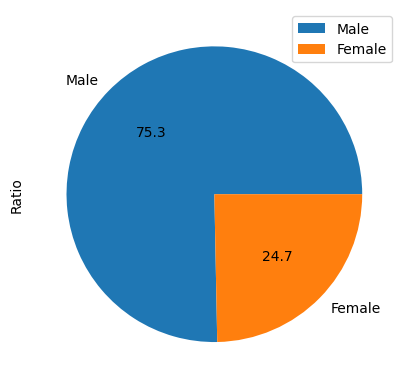

In [20]:
data.plot.pie(y="Ratio", autopct="%.1f")

In [21]:
df.groupby("Gender").size()

Gender
F    135809
M    414259
dtype: int64

<Axes: title={'center': 'Gender Ratio'}>

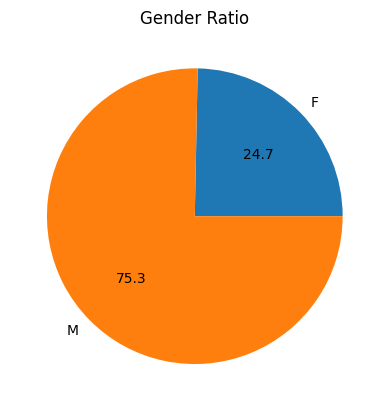

In [22]:
# Make the plot
df.groupby("Gender").size().plot(kind="pie", autopct="%.1f", title="Gender Ratio")

## Bar Graph

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

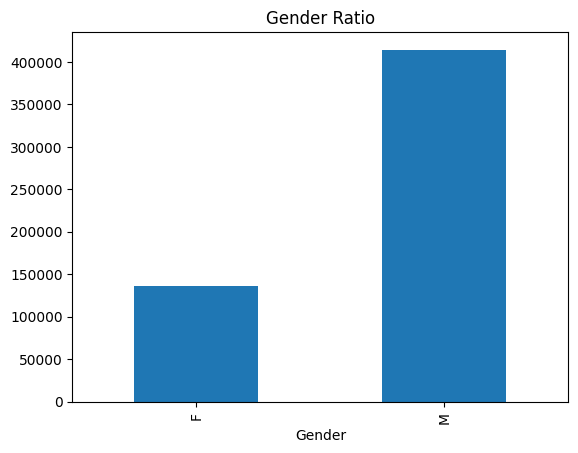

In [23]:
df.groupby("Gender").size().plot(kind="bar",  title="Gender Ratio")

## Analyze based on the purchases

In [24]:
df.groupby("Gender").sum()["Purchase"]

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

In [25]:
df.groupby("Gender").size()

Gender
F    135809
M    414259
dtype: int64

In [26]:
df.groupby("Gender").mean()["Purchase"]

TypeError: agg function failed [how->mean,dtype->object]

## Analyze based on Ages

In [27]:
df.groupby("Age").size()

Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
dtype: int64

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

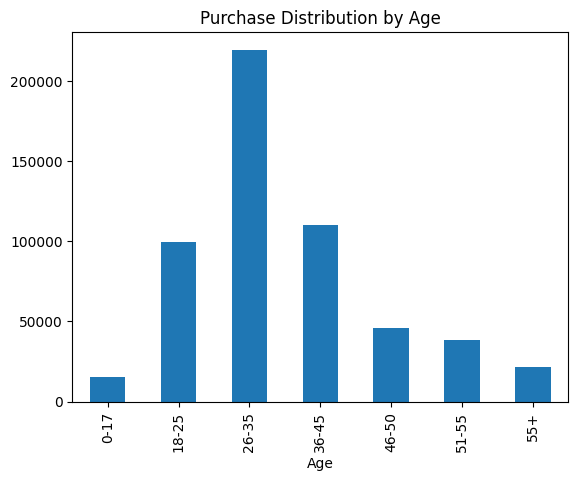

In [29]:
# Plot it
df.groupby("Age").size().plot(kind="bar", title="Purchase Distribution by Age")

In [32]:
for i in df["Age"].unique():
    print(i)

0-17
55+
26-35
46-50
51-55
36-45
18-25


In [35]:
df[df["Age"]==i]["Product_ID"].nunique()

3220

<Axes: title={'center': 'Amount Spent by Age'}, xlabel='Age'>

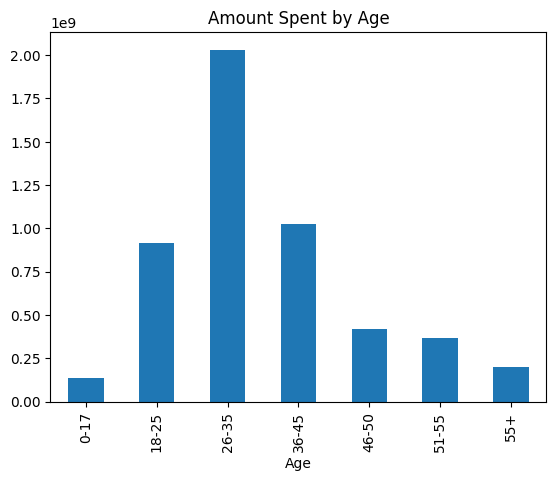

In [36]:
df.groupby("Age").sum()["Purchase"].plot(kind="bar", title="Amount Spent by Age")

In [38]:
df.groupby("Age").mean()["Purchase"].plot(kind="bar", title="Amount Spent by Age")

TypeError: agg function failed [how->mean,dtype->object]

## Multi Column Analysis

<Axes: xlabel='Age', ylabel='count'>

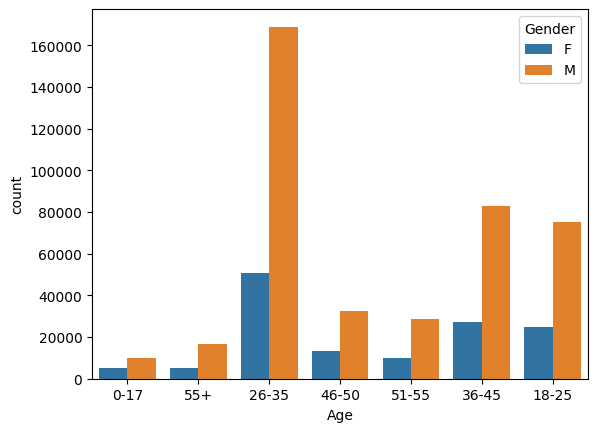

In [40]:
sns.countplot(x="Age", hue="Gender", data=df)

<Axes: xlabel='City_Category', ylabel='count'>

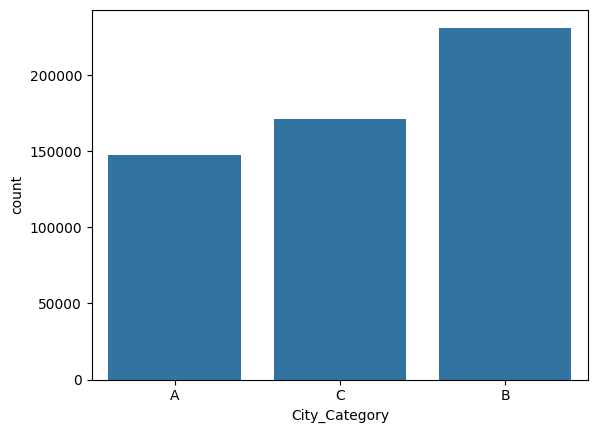

In [41]:
sns.countplot(x=df["City_Category"])

<Axes: >

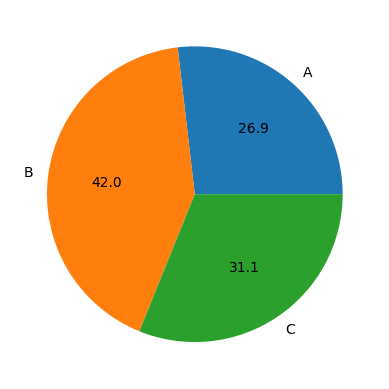

In [42]:
df.groupby("City_Category").size().plot(kind="pie", autopct="%0.1f")

<Axes: xlabel='City_Category', ylabel='count'>

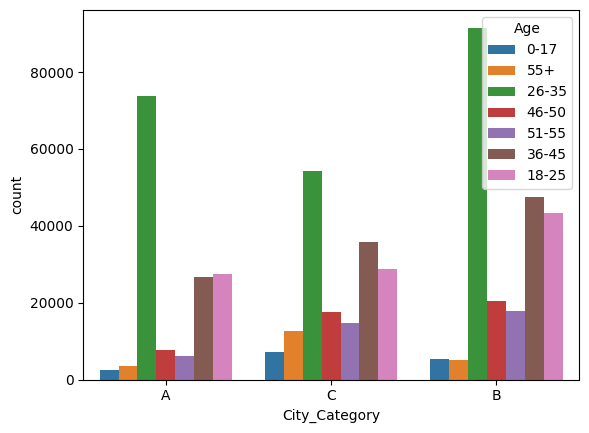

In [43]:
sns.countplot(x=df["City_Category"], hue="Age", data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

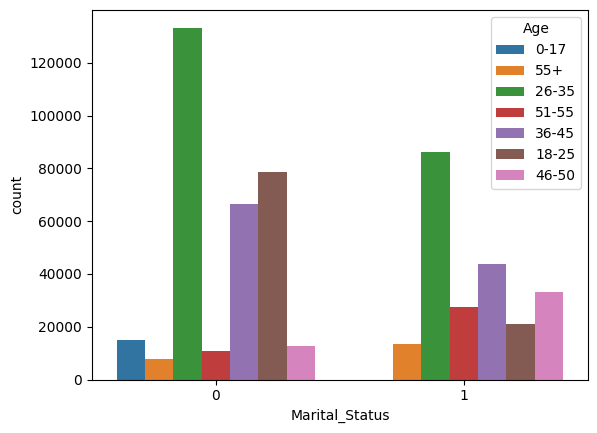

In [44]:
sns.countplot(x=df["Marital_Status"], hue="Age", data=df)

<Axes: xlabel='City_Category', ylabel='count'>

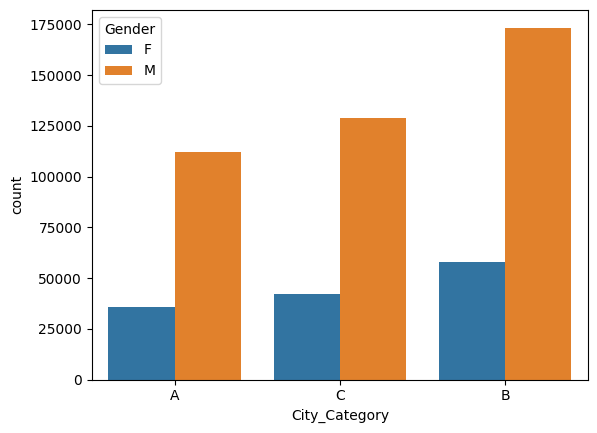

In [45]:
sns.countplot(x=df["City_Category"], hue="Gender", data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

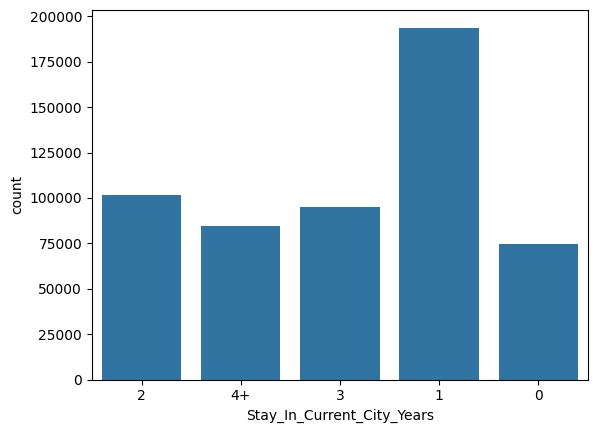

In [47]:
sns.countplot(x=df["Stay_In_Current_City_Years"])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

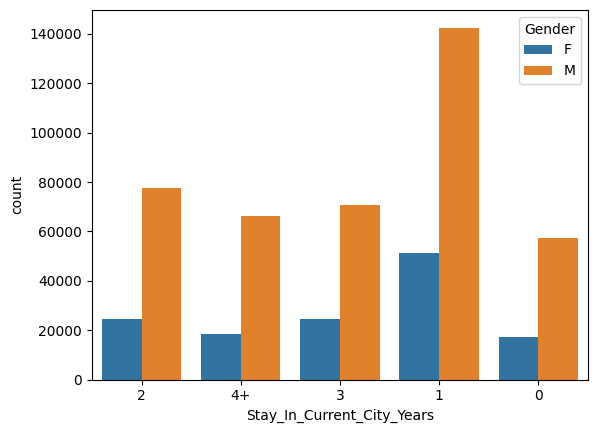

In [48]:
sns.countplot(x=df["Stay_In_Current_City_Years"], hue="Gender", data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

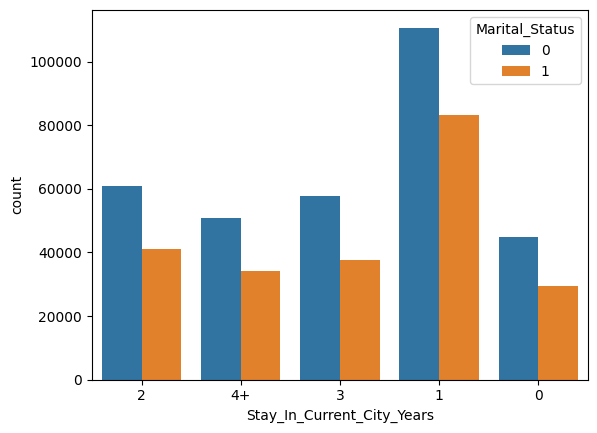

In [49]:
sns.countplot(x=df["Stay_In_Current_City_Years"], hue="Marital_Status", data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

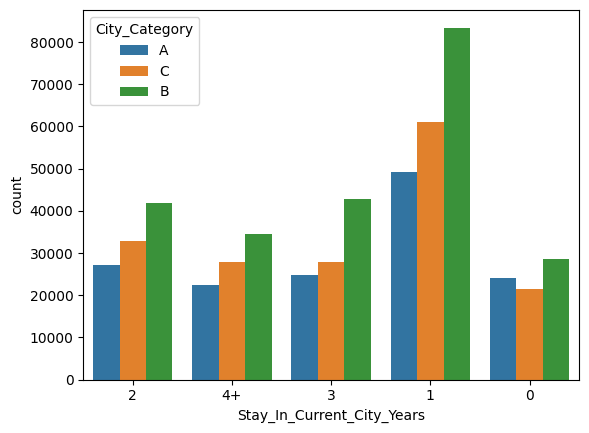

In [50]:
sns.countplot(x=df["Stay_In_Current_City_Years"], hue="City_Category", data=df)

<Axes: >

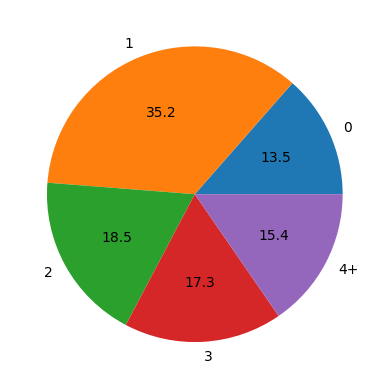

In [51]:
df.groupby("Stay_In_Current_City_Years").size().plot(kind="pie", autopct="%.1f")

<Axes: xlabel='Stay_In_Current_City_Years'>

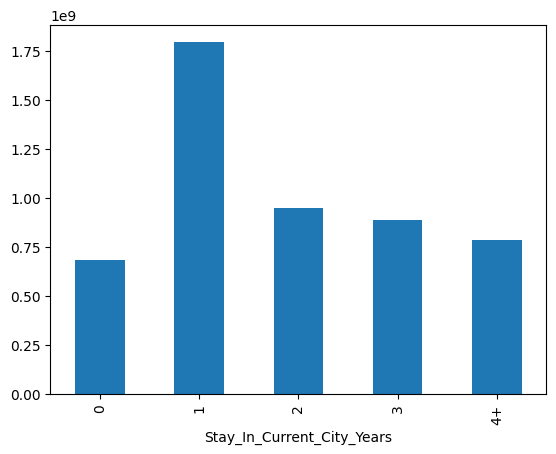

In [54]:
df.groupby("Stay_In_Current_City_Years").sum()["Purchase"].plot(kind="bar")

In [55]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind="bar")

TypeError: agg function failed [how->mean,dtype->object]

<Axes: xlabel='Occupation'>

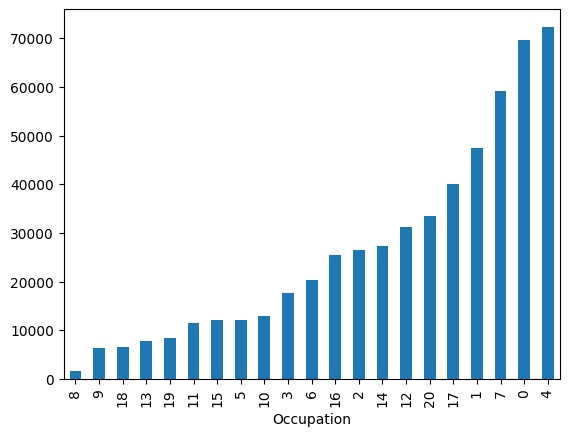

In [58]:
df.groupby("Occupation").size().sort_values().plot(kind="bar")

<Axes: xlabel='Occupation', ylabel='count'>

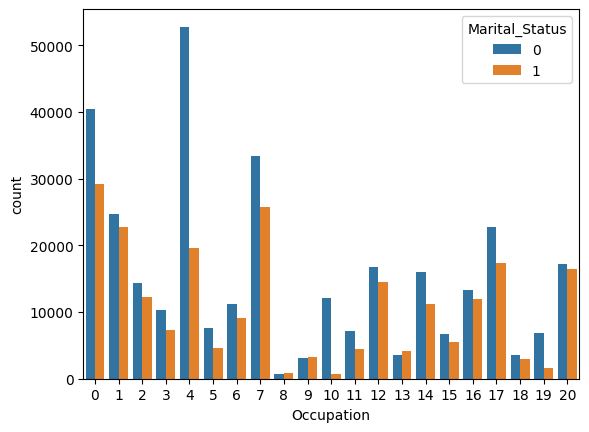

In [59]:
sns.countplot(x="Occupation", hue="Marital_Status", data=df)

<Axes: xlabel='Occupation', ylabel='count'>

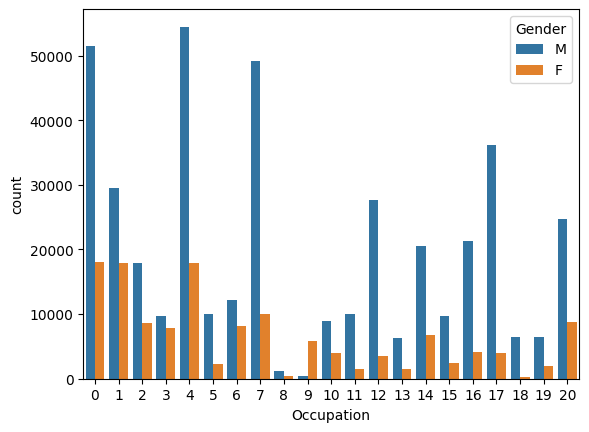

In [60]:
sns.countplot(x="Occupation", hue="Gender", data=df)

In [61]:
df.groupby("Occupation").nunique()["Product_ID"]

Occupation
0     3249
1     3037
2     2906
3     2667
4     3184
5     2353
6     2733
7     3082
8     1033
9     1832
10    2124
11    2247
12    2675
13    1959
14    2688
15    2189
16    2872
17    2840
18    2056
19    2309
20    3156
Name: Product_ID, dtype: int64

<Axes: xlabel='Occupation'>

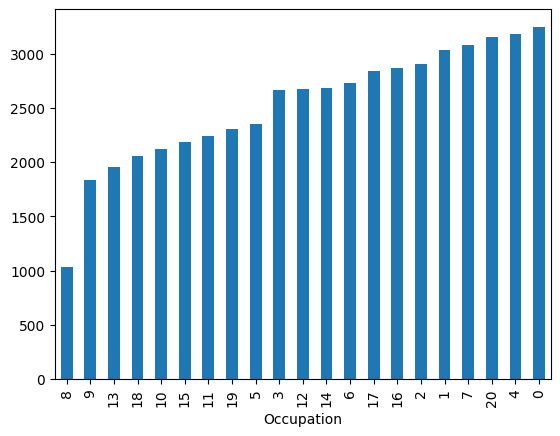

In [63]:
df.groupby("Occupation").nunique()["Product_ID"].sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

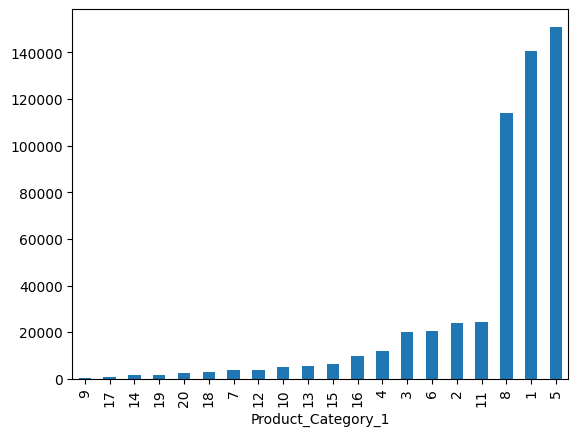

In [66]:
df.groupby("Product_Category_1").size().sort_values().plot(kind="bar")